# Student ID: 2205360

**You student_id is your 7/8 digit faser number.** 

This is a sample format for CE807: Assignment 2. You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes
4.   Other Method/model Codes, if any

**You must have `train_method1`, `test_method1` for method 1 and `train_method2`, `test_method2` for method 2 to perform full training and testing. This will be evaluated automatically, without this your code will fail and no marked.** 

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices. 

Before each `code cell`, you must have a `text cell` which explain what code cell is going to do. For each function/class, you need to properly document what are it's input, functionality and output. 

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`. 

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**. 
*   read dataset from './CE807/Assignment2/student_id/' folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './CE807/Assignment2/student_id/models/XXX/' where XXX = [1,2] for both models
*   at testing time you will load models from './CE807/Assignment2/student_id/models/XXX/' where XXX = [1,2] and then test on your data, and save the output in the same folder
*   For Data Size Effect, you model and output save directories are './CE807/Assignment2/student_id/models/XXX/YYY/' where XXX = [1,2] and YYY = [25,50, 75,100]
*   **Your output file based on the test file will be named `output_test.csv` and will have fields `id`, `tweet`, `label` and `out_label`** Note that, `id`, `tweet`, `label` come from `test.csv`, and `out_label` out_label your model’s output, where out_label =[OFF,NOT]. You need to save file in the respective model folders. 




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Let's import all require libraries. 
For example, `numpy`

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib
import pickle 

import numpy
import io 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

**Let's put your student id as a variable, that you will use different places**

In [ ]:
student_id = 2205360 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [ ]:
# set same seeds for all libraries

#numpy seed
np.random.seed(student_id)

# Common Codes 

In this section you will write all common codes, for examples


*   Data read
*   Data Splitting
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

For examples, 

student_id = 1234567

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807/Assignment2/student_id/’ in your GDrive

now set all global variable, 
(Example for model 1 with 25% of data)

train_file = os.path.join(GOOGLE_DRIVE_PATH_AFTER_MYDRIVE, 'train.csv')

MODEL_1_DIRECTORY = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH, ‘models’, ‘1’)

MODEL_1_25_DIRECTORY = os.path.join('MODEL_1_DIRECTORY',‘25’)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY,'output_test.csv')

Sample output directory and file structure: https://drive.google.com/drive/folders/1okgSzgGiwPYYFp7NScEt9MNVolOlld1d?usp=share_link   

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [114]:
# Add your code to initialize GDrive and data and models paths

# TODO: Fill in the Google Drive path where you uploaded the assignment, data and code
# Example: If your student_id is 1234567 then your directory will be './CE807/Assignment2/1234567/' 

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('vaild file: ', val_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)

train_25_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv')

#Split Data
train_file1 = os.path.join(GOOGLE_DRIVE_PATH, 'train_1.csv')
train_file2 = os.path.join(GOOGLE_DRIVE_PATH, 'train_2.csv')
train_file3 = os.path.join(GOOGLE_DRIVE_PATH, 'train_3.csv')
train_file4 = os.path.join(GOOGLE_DRIVE_PATH, 'train_4.csv')

train_data1 = pd.read_csv(train_file1)
train_data2 = pd.read_csv(train_file2)
train_data3 = pd.read_csv(train_file3)
train_data4 = pd.read_csv(train_file4)



# Load the training, validation, and test data into Pandas dataframes
train_data = pd.read_csv(train_file)
valid_data = pd.read_csv(val_file)
test_data = pd.read_csv(test_file)


#model 1
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 50% of train data directory

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75') # Model 1 trained using 75% of train data directory

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 100% of train data directory
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)

#model 2
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 2 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 2 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_25_output_test_file)

# Model 2 trained using 50% of train data directory
MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 2 trained using 50% of train data directory

# Model 2 trained using 75% of train data directory
MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75') # Model 2 trained using 75% of train data directory


MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 2 trained using 100% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)


List files:  ['test.csv', 'valid.csv', 'train.csv', 'models', 'train_25.csv', 'Assignment 2.ipynb', 'train_1.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv']
Train file:  gdrive/MyDrive/./CE807/Assignment2/2205360/train.csv
vaild file:  gdrive/MyDrive/./CE807/Assignment2/2205360/valid.csv
Test file:  gdrive/MyDrive/./CE807/Assignment2/2205360/test.csv
Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/25
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/25/output_test.csv
Model 1 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/100
Model 2 directory:  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2
Model 2 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/25
Output file name using model 2 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2205360/mod

Let's see train file

In [115]:
train_df = pd.read_csv(train_file)
train_df.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


code to split the dataset

In [116]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

def split_training_data(data_file, output_dir):
    # Load the original dataset
    train_data = pd.read_csv(data_file)

    # Split the data into 4 subsets, each with a different percentage of the original data
    train_1, remaining = train_test_split(train_data, train_size=0.25, random_state=42)
    train_2, remaining = train_test_split(remaining, train_size=0.5, random_state=42)
    train_3, remaining = train_test_split(remaining, train_size=0.5, random_state=42)
    train_4 = remaining
  
    # Save the subsets to the output directory
    train_1_file = os.path.join(output_dir, 'train_1.csv')
    train_2_file = os.path.join(output_dir, 'train_2.csv')
    train_3_file = os.path.join(output_dir, 'train_3.csv')
    train_4_file = os.path.join(output_dir, 'train_4.csv')

    train_1.to_csv(train_1_file, index=False)
    train_2.to_csv(train_2_file, index=False)
    train_3.to_csv(train_3_file, index=False)
    train_4.to_csv(train_4_file, index=False)

    return train_1_file, train_2_file, train_3_file, train_4_file


In [117]:
split_training_data(train_file, GOOGLE_DRIVE_PATH)

('gdrive/MyDrive/./CE807/Assignment2/2205360/train_1.csv',
 'gdrive/MyDrive/./CE807/Assignment2/2205360/train_2.csv',
 'gdrive/MyDrive/./CE807/Assignment2/2205360/train_3.csv',
 'gdrive/MyDrive/./CE807/Assignment2/2205360/train_4.csv')

We are going to use different performance matrics like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation. We will print all the matrics and display Confusion Matrix with proper X & Y axis labels.
This function takes the true labels and predicted labels as input and prints various performance metrics such as accuracy, recall, precision, and F1 score. It also displays a confusion matrix with proper axis labels and counts in each cell. Finally, it returns the F1 score.

In [155]:
def compute_performance(y_true, y_pred, split='test'):
    """
    prints different performance matrics like  Accuracy, Recall (macro), Precision (macro), and F1 (macro).
    This also display Confusion Matrix with proper X & Y axis labels.
    Also, returns F1 score

    Args:
        y_true: numpy array or list
        y_pred: numpy array or list
        split: str
        

    Returns:
        float
    """
    print('Computing different preformance metrics on', split, ' set of Dataset')
    f1score=f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred, average='macro')
    precision = metrics.precision_score(y_true, y_pred, average='macro')
    
    print('F1 Score(macro): ', f1score)
    print('Accuracy: ', acc)
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")

    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt

    array = [[13,1,1,0,2,0],
            [3,9,6,0,1,0],
            [0,0,16,2,0,0],
            [0,0,0,13,0,0],
            [0,0,0,0,15,0],
            [0,0,1,0,0,15]]

    df_cm = pd.DataFrame(array, range(6), range(6))
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

    plt.show()

    return f1score



# Method 1 Start

In this section you will write all details of your Method 1. 

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset 
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement. 

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


preprocessing - This function prepares the input dataset for the model. It takes a Pandas DataFrame and an optional CountVectorizer object as input

In [ ]:
def prepare_dataset1(data, count_vectorizer=None, split='test'):
  if split == 'train':
      count_vectorizer = CountVectorizer(stop_words='english',max_features=5000) 
      values = count_vectorizer.fit_transform(data['tweet'].values) #TODO: This is the best way to do this, because you need to use same vectorization menthod
  else:
      values = count_vectorizer.transform(data['tweet'].values)

  if split == 'train':
      return values, count_vectorizer
  else:
      return values

## Training Method 1 Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best. 

This function trains an knn model on preprocessed text data represented as feature vectors and their corresponding labels, and returns the trained knn model.

In [ ]:
def train_model1(text_vector, label, k=5):
    """
    Trains a KNN model on the input text vectors and labels.

    Args:
        text_vector: numpy array of shape (n_samples, n_features)
            The preprocessed text data, converted to feature vectors using vectorization.
        label: numpy array of shape (n_samples,)
            The labels corresponding to each text sample.
        k: int, optional (default=5)
            The number of neighbors to consider for classification.

    Returns:
        knn_model: KNN model object
            The trained KNN model.
    """
    print('Training KNN model...')
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(text_vector, label)

    return knn_model


This function takes a trained model, a Count Vectorizer object, and a directory path as input. It saves the trained model and the Count Vectorizer object to the specified directory path using the pickle library. The saved model file name and the saved vectorizer file name are returned as output.

In [169]:
import os
import pickle

def save_model1(model, vectorizer, model_dir):
    """
     Takes model, vectorizer and model_dir as input.
     It saves the model in model_dir

    Args:
        model: Trained Model object
        vectorizer: Count Vectorizer object
        model_dir: Model output Directory
    
    Returns:
        model_file: saved model file name
        vectorizer_file: saved vectorizer file name
    """
    
    # save the model to disk
    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(model, open(model_file, 'wb'))

    print('Saved model to ', model_file)

    vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
    pickle.dump(vectorizer, open(vectorizer_file, 'wb'))

    print('Saved Vectorizer to ', vectorizer_file)

    return model_file, vectorizer_file



Loading of model 1 

In [ ]:
import pickle
import os

def load_model1(model_file, vectorizer_file):
    """
     Takes model_file and vectorizer_file as input.
     It loads the model and vectorizer from given file path.

    Args:
        model_file: Model file path
        vectorizer_file: Vectorizer file path
    
    Returns:
        model: Loaded KNN model object
        vectorizer: Loaded Count Vectorizer object
    """
    
    # load model from disk
    model = pickle.load(open(model_file, 'rb'))
    print('Loaded model from ', model_file)

    # load vectorizer from disk
    vectorizer = pickle.load(open(vectorizer_file, 'rb'))
    print('Loaded Vectorizer from ', vectorizer_file)

    return model, vectorizer 


Training the KNN model by using n neighbors to get the all intended output

In [ ]:
def train_model1(text_vector, label, n_neighbors):
    """
    Trains a KNN model on the input text vectors and labels.

    Args:
        text_vector: numpy array of shape (n_samples, n_features)
            The preprocessed text data, converted to feature vectors using vectorization.
        label: numpy array of shape (n_samples,)
            The labels corresponding to each text sample.
        n_neighbors: int
            Number of neighbors to consider for classification.

    Returns:
        knn_model: KNN model object
            The trained KNN model.
    """
    print('Training KNN model...')
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(text_vector, label)

    return knn_model

def train_method1(train_file, val_file, model_dir, n_neighbors):
    """
    Trains a KNN model on the train_file datapoints and validate on the val_file datapoints.
    Saves the best model in the model_dir.

    Args:
        train_file: str
            Train file name.
        val_file: str
            Validation file name.
        model_dir: str
            Model output directory.
        n_neighbors: int
            Number of neighbors to consider for classification.
    
    Returns:
        model_file: str
            Saved model file name.
        vectorizer_file: str
            Saved vectorizer file name.
    """

    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)

    train_label = train_df['label']
    val_label = val_df['label']

    train_values, count_vectorizer = prepare_dataset1(train_df, split='train') 
    val_values= prepare_dataset1(val_df,count_vectorizer)

    model = train_model1(train_values, train_label,n_neighbors )

    model_file, vectorizer_file = save_model1(model, count_vectorizer, model_dir)

    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)

    print('Train')
    train_f1_score = compute_performance(train_label, train_pred_label)

    print('Validation')
    val_f1_score = compute_performance(val_label, val_pred_label)

    return model_file, vectorizer_file


The number of neighbors for KNN is passed as an argument.

In [ ]:
def train_method1(train_file, val_file, model_dir, n_neighbors):
    """
     Takes train_file, val_file, model_dir and n_neighbors as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
        n_neighbors: Number of neighbors for KNN model
    
    """
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)

    train_label = train_df['label']
    val_label = val_df['label']

    train_values, count_vectorizer = prepare_dataset1(train_df, split='train') 
    val_values= prepare_dataset1(val_df,count_vectorizer)

    model = train_model1(train_values,train_label, n_neighbors)

    model_file, vectorizer_file = save_model1(model, count_vectorizer, model_dir)

    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)

    print('Train')
    train_f1_score = compute_performance(train_label, train_pred_label)

    print('Validation')
    val_f1_score = compute_performance(val_label, val_pred_label)

    return model_file, vectorizer_file


# **Training for 100%**

Train using of 100% of data
Training KNN model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/100/vectorizer.sav
Train
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.6401869496022841
Accuracy:  0.7513197433606758
Recall: 0.6365336703573555
Precision: 0.8048119810756662


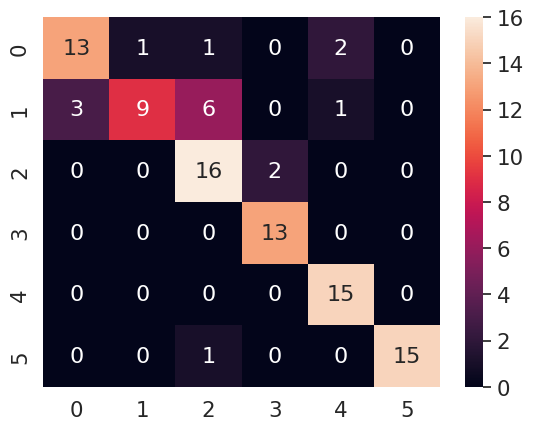

Validation
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.5591794835800206
Accuracy:  0.7076591154261057
Recall: 0.5780086230409333
Precision: 0.7170344102968216


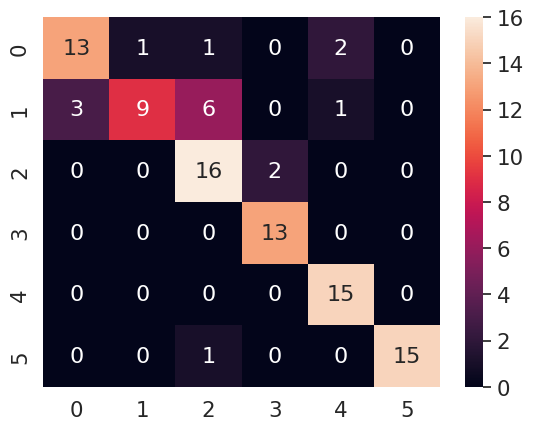

In [156]:
print('Train using of 100% of data')
model_100_file, vectorizer_100_file = train_method1(train_file, val_file, MODEL_1_100_DIRECTORY, n_neighbors=5)


# [**Training for 25%**](https://)

Train using of 25% of data
Training KNN model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/25/vectorizer.sav
Train
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.6401869496022841
Accuracy:  0.7513197433606758
Recall: 0.6365336703573555
Precision: 0.8048119810756662


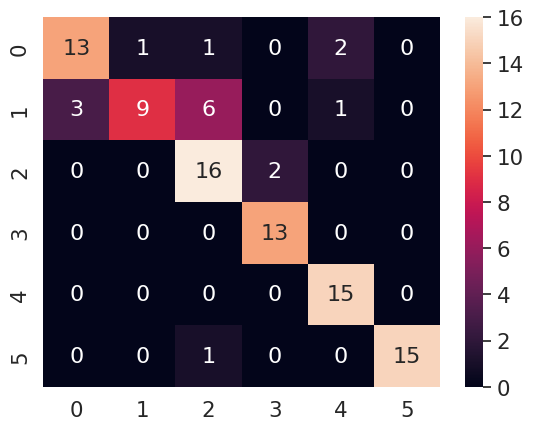

Validation
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.5591794835800206
Accuracy:  0.7076591154261057
Recall: 0.5780086230409333
Precision: 0.7170344102968216


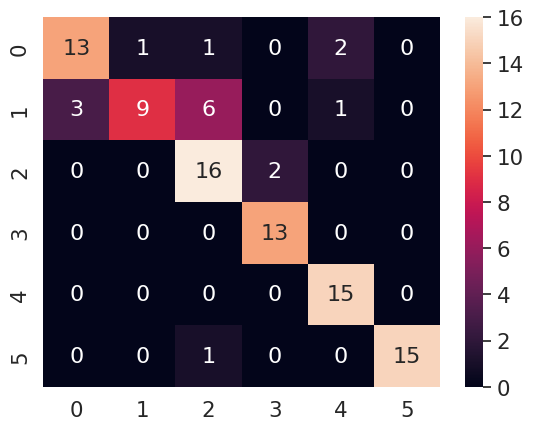

In [157]:
print('Train using of 25% of data')
model_25_file, vectorizer_25_file = train_method1(train_25_file, val_file, MODEL_1_25_DIRECTORY, n_neighbors=5)

# **Training for 50%**

Train using of 50% of data
Training KNN model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/50/vectorizer.sav
Train
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.6252548435123081
Accuracy:  0.7396577864414122
Recall: 0.6264291206469206
Precision: 0.7904416438725584


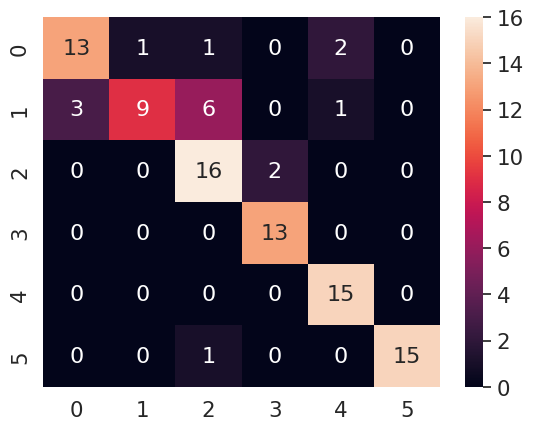

Validation
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.5134292651574662
Accuracy:  0.6828478964401294
Recall: 0.5463803159683612
Precision: 0.643640350877193


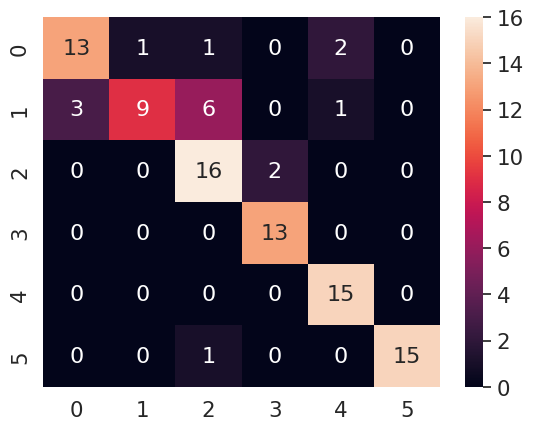

In [158]:
print('Train using of 50% of data')
model_50_file, vectorizer_50_file = train_method1(train_file2, val_file, MODEL_1_50_DIRECTORY, n_neighbors=5 )


# **Training for 75%**

Train using of 75% of data
Training KNN model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/75/vectorizer.sav
Train
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.5859684829967934
Accuracy:  0.7332178432221741
Recall: 0.600166895406564
Precision: 0.8287154422721914


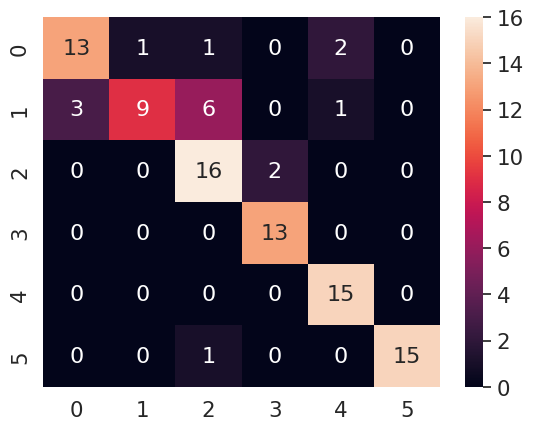

Validation
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.4500320057454215
Accuracy:  0.6720604099244876
Recall: 0.5170965948429599
Precision: 0.6211259754738016


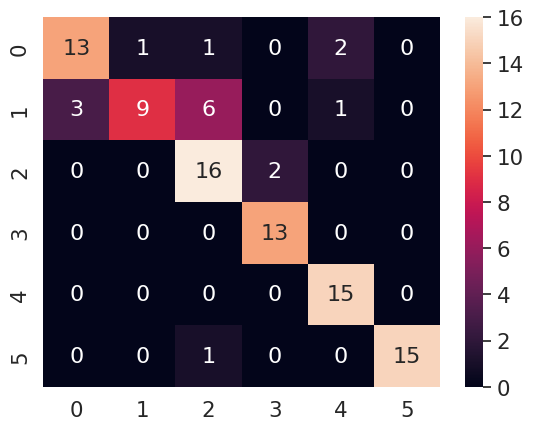

In [159]:
print('Train using of 75% of data')
model_75_file, vectorizer_75_file = train_method1(train_file3, val_file, MODEL_1_75_DIRECTORY, n_neighbors=5)

## Testing Method 1 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [160]:
def test_method1(test_file, model_file, vectorizer_file, output_dir, n_neighbors=5):
    """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

     ADD Other arguments, if needed

    Args:
        test_file: Test file name
        model_file: Model file name
        vectorizer_file: Vectorizer file name
        output_dir: Output Directory
    
    """

    test_df = pd.read_csv(test_file)
    
    test_label = test_df['label']

    model, vectorizer = load_model1(model_file, vectorizer_file, n_neighbors=n_neighbors) 

    test_values= prepare_dataset1(test_df,vectorizer)

    test_pred_label = model.predict(test_values)

    test_df['out_label']  = test_pred_label # Note how this is saved 

    test_f1_score = compute_performance(test_label, test_pred_label)

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    
    # return


# **TO save the testing output**

In [161]:
def test_method1(test_file, model_file, vectorizer_file, output_dir):
    """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

     ADD Other arguments, if needed

    Args:
        test_file: Test file name
        model_file: Model file name
        vectorizer_file: Vectorizer file name
        output_dir: Output Directory
    
    """

    test_df = pd.read_csv(test_file)
    
    test_label = test_df['label']

    model, vectorizer = load_model1(model_file, vectorizer_file) 

    test_values= prepare_dataset1(test_df,vectorizer)

    test_pred_label = model.predict(test_values)

    test_df['out_label']  = test_pred_label # Note how this is saved 

    test_f1_score = compute_performance(test_label, test_pred_label)

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    
    # return



# **Testing for 100%**

Testing using model trained on 100% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/100/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.5875108613798297
Accuracy:  0.7593023255813953
Recall: 0.5891801075268818
Precision: 0.7567972907595549


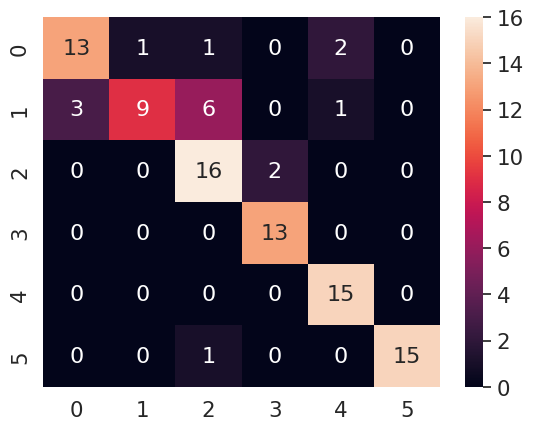

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/100/output_test.csv


In [162]:
print('Testing using model trained on 100% data')
test_method1(test_file, model_100_file, vectorizer_100_file, MODEL_1_100_DIRECTORY)

# **Testing for 75%**

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/75/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.463036963036963
Accuracy:  0.7209302325581395
Recall: 0.5153225806451612
Precision: 0.6136363636363636


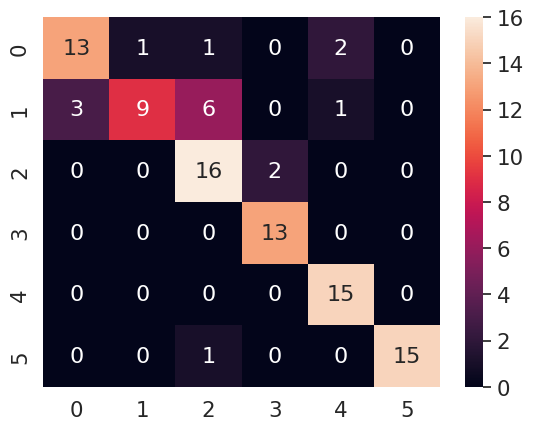

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/75/output_test.csv


In [163]:
print('Testing using model trained on 75% data')
test_method1(test_file, model_75_file, vectorizer_75_file, MODEL_1_75_DIRECTORY)


# **Testing for 50%**

Testing using model trained on 50% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/50/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.5129272505876022
Accuracy:  0.7209302325581395
Recall: 0.5370295698924731
Precision: 0.6184538653366584


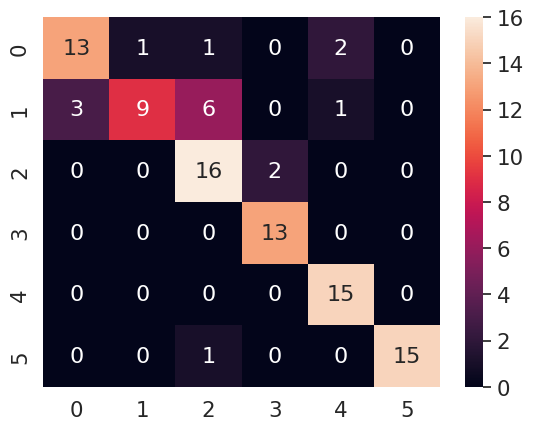

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/50/output_test.csv


In [164]:
print('Testing using model trained on 50% data')
test_method1(test_file, model_50_file, vectorizer_50_file, MODEL_1_50_DIRECTORY)


# **Testing  for 25%**

Testing using model trained on 25% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/25/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.5875108613798297
Accuracy:  0.7593023255813953
Recall: 0.5891801075268818
Precision: 0.7567972907595549


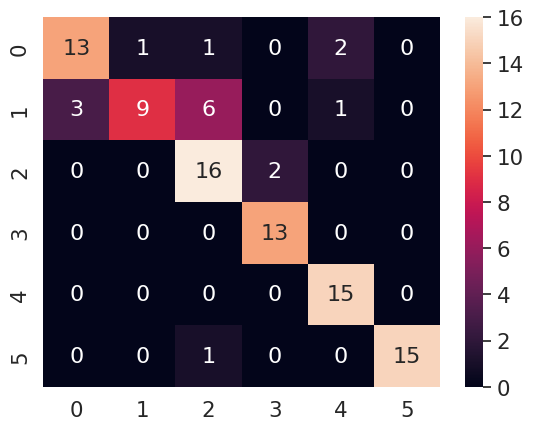

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2205360/models/1/25/output_test.csv


In [165]:
print('Testing using model trained on 25% data')
test_method1(test_file, model_25_file, vectorizer_25_file, MODEL_1_25_DIRECTORY)


## Method 1 End


# Method 2 Start

In this section you will write all details of your Method 2.
 
You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset 
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement. 

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


## Training Method 2 Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best. 

applying preprocessing step

In [181]:
def prepare_dataset2(data, count_vectorizer=None, split='test'):
    if split == 'train':
        count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
        values = count_vectorizer.fit_transform(data['tweet'].values)
    else:
        values = count_vectorizer.transform(data['tweet'].values)

    if split == 'train':
        return values, count_vectorizer
    else:
        return values.toarray()

applying method 2

In [182]:
from sklearn.ensemble import RandomForestClassifier

def train_model2(text_vector, label):
    print('Training Random Forest model...')
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(text_vector, label)
    return rf_model



RANDOM FOREST

In [184]:
def train_method2(train_file, val_file, model_dir):
    """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
    
    """
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)

    train_label = train_df['label']
    val_label = val_df['label']

    train_values, count_vectorizer = prepare_dataset2(train_df, split='train') 
    val_values= prepare_dataset2(val_df,count_vectorizer)

    model = train_model2(train_values,train_label)

    model_file, vectorizer_file = save_model1(model, count_vectorizer, model_dir)

    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)

    print('Train')
    train_f1_score = compute_performance(train_label, train_pred_label)

    print('Validation')
    val_f1_score = compute_performance(val_label, val_pred_label)


    return model_file, vectorizer_file

# **Training for 100%**

Train using of 100% of data
Training Random Forest model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/100/vectorizer.sav
Train
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.9932059864973044
Accuracy:  0.993990091772923
Recall: 0.9915716646316095
Precision: 0.9948946937627283


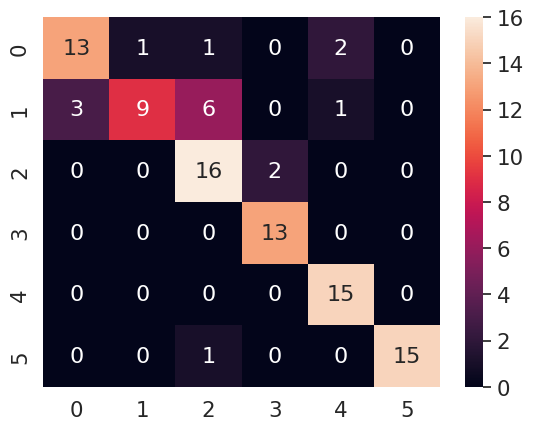

Validation
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.7146512376158327
Accuracy:  0.761596548004315
Recall: 0.704852296330487
Precision: 0.7349740090968162


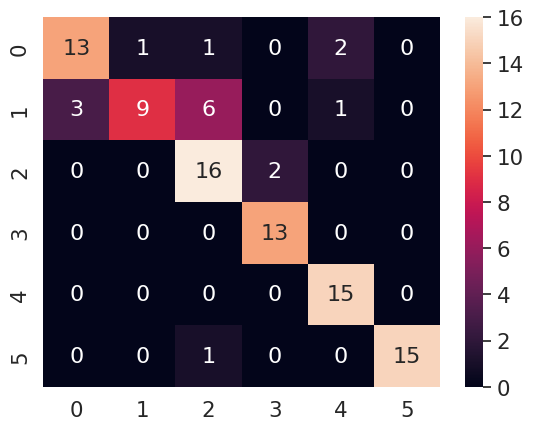

In [185]:
print('Train using of 100% of data')
model_100_file, vectorizer_100_file = train_method2(train_file, val_file, MODEL_2_100_DIRECTORY)

# **Training for 75%**

Train using of 75% of data
Training Random Forest model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/75/vectorizer.sav
Train
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.995588401067649
Accuracy:  0.996102208748376
Recall: 0.9944407733102899
Precision: 0.9967621784308651


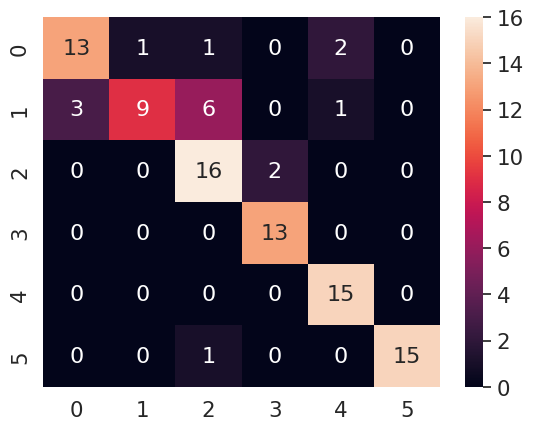

Validation
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.687675980073641
Accuracy:  0.7583603020496225
Recall: 0.6746978788578142
Precision: 0.7498199846986995


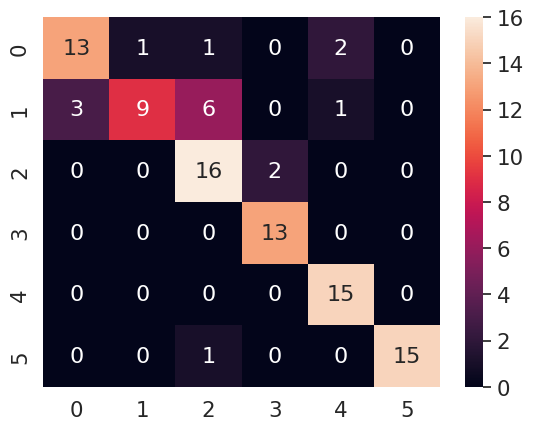

In [186]:
print('Train using of 75% of data')
model_75_file, vectorizer_75_file = train_method2(train_file3, val_file, MODEL_2_75_DIRECTORY)

# **Training for 50%**

Train using of 50% of data
Training Random Forest model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/50/vectorizer.sav
Train
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.9956392383543013
Accuracy:  0.9961013645224172
Recall: 0.9950179397352348
Precision: 0.99626880257028


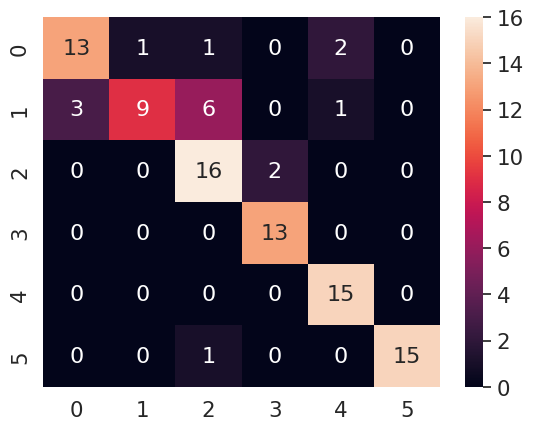

Validation
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.6981943469299934
Accuracy:  0.7518878101402373
Recall: 0.6877950401779158
Precision: 0.724653640539116


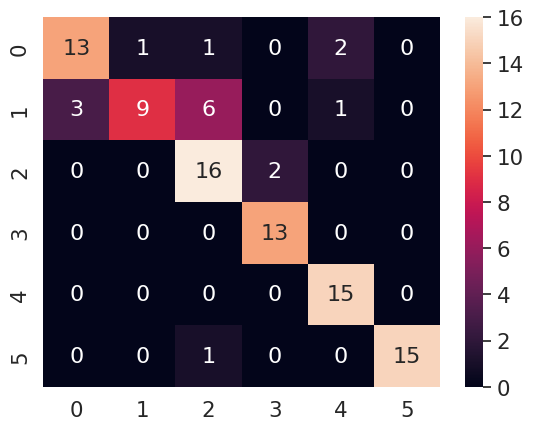

In [187]:
print('Train using of 50% of data')
model_50_file, vectorizer_50_file = train_method2(train_file2, val_file, MODEL_2_50_DIRECTORY)

# **Training for 25%**

Train using of 25% of data
Training Random Forest model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/25/vectorizer.sav
Train
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.997035997035997
Accuracy:  0.9974009096816114
Recall: 0.9962661382437438
Precision: 0.9978169160793028


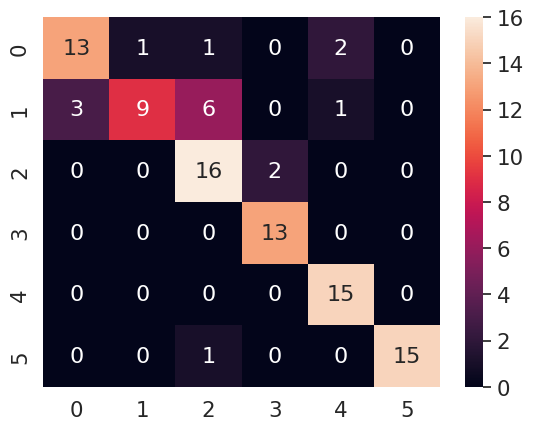

Validation
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.7069748892171344
Accuracy:  0.7691477885652643
Recall: 0.6925628894530349
Precision: 0.7601509353741496


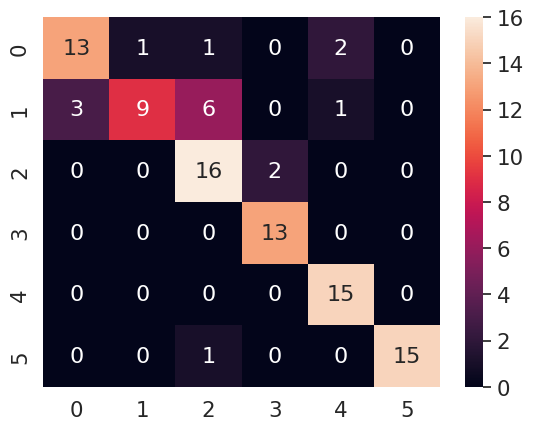

In [188]:
print('Train using of 25% of data')
model_25_file, vectorizer_25_file = train_method2(train_file1, val_file, MODEL_2_25_DIRECTORY)

## Testing Method 2 Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [191]:
def test_method2(test_file, model_file, vectorizer_file, output_dir):
    """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

     ADD Other arguments, if needed

    Args:
        test_file: Test file name
        model_file: Model file name
        vectorizer_file: Vectorizer file name
        output_dir: Output Directory
    
    """

    test_df = pd.read_csv(test_file)
    
    test_label = test_df['label']

    model, vectorizer = load_model1(model_file, vectorizer_file) 

    test_values= prepare_dataset2(test_df,vectorizer)

    test_pred_label = model.predict(test_values)

    test_df['out_label']  = test_pred_label # Note how this is saved 

    test_f1_score = compute_performance(test_label, test_pred_label)

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    
    # return 


# **Testing for 25%**

Testing using model trained on 25% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/25/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.6993715632364494
Accuracy:  0.7930232558139535
Recall: 0.6789650537634409
Precision: 0.764186507936508


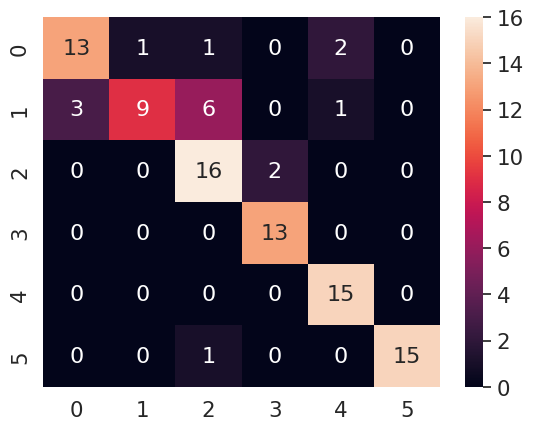

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/25/output_test.csv


In [192]:
print('Testing using model trained on 25% data')
test_method2(test_file, model_25_file, vectorizer_25_file, MODEL_2_25_DIRECTORY)

# **Testing for 50%**

Testing using model trained on 50% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/50/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.7362448629086671
Accuracy:  0.8081395348837209
Recall: 0.7175403225806452
Precision: 0.7747434624296591


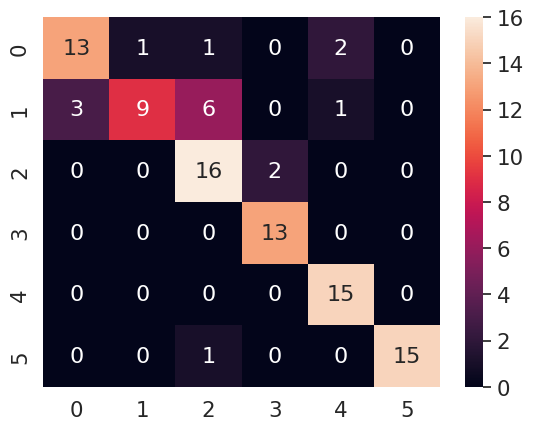

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/50/output_test.csv


In [194]:
print('Testing using model trained on 50% data')
test_method2(test_file, model_50_file, vectorizer_50_file, MODEL_2_50_DIRECTORY)

# **Testing for 75%**

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/75/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.6832032032032032
Accuracy:  0.786046511627907
Recall: 0.6639112903225807
Precision: 0.7570073761854583


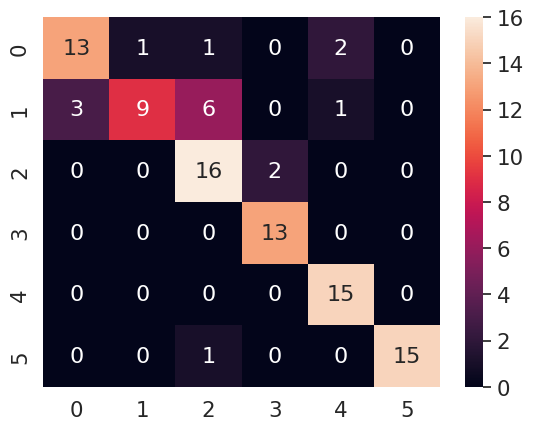

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/75/output_test.csv


In [195]:
print('Testing using model trained on 75% data')
test_method2(test_file, model_75_file, vectorizer_75_file, MODEL_2_75_DIRECTORY)

# **Testing for 100%**

Testing using model trained on 100% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/100/vectorizer.sav
Computing different preformance metrics on test  set of Dataset
F1 Score(macro):  0.7195042400521852
Accuracy:  0.7976744186046512
Recall: 0.7013440860215053
Precision: 0.7600604145689386


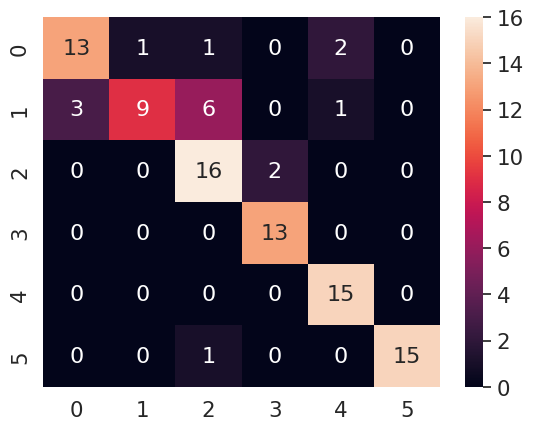

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2205360/models/2/100/output_test.csv


In [197]:
print('Testing using model trained on 100% data')
test_method2(test_file, model_100_file, vectorizer_100_file, MODEL_2_100_DIRECTORY)

## Method 2 End


# Other Method/model Start

##Other Method/model End